# Computer Lab 2, Part I

This notebook consists of instructions, exercises and questions that form the practical part of Lab II, Part I.
In this assignment, you will learn the basics of the OpenStack Python APIs that can be used to interact directly with
the IaaS services Keystone (Identity), Glance (Image) and Nova (compute). Please prepare your solution and answers to
questions directly in this notebook, and export it to PDF. Upload that PDF as to the student portal to complete Part I
of the Lab.

## Task - 1

In [1]:
from os import environ as env
import keystoneclient.v3.client as ksclient

To establish a client connection, we will need to pass a dictionary with information about the tenant, user, credentials and the API Identity endpoint. Here, I have sourced the "openrc.sh file" obtained from the Horizon dashboard in the underlying shell prior to starting the notebook. Hence, in order to actually run the code below, you would need to do the same with your own credentials. 

In [2]:
keystone = ksclient.Client(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           version=env['OS_IDENTITY_API_VERSION'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'],
                           region_name=env['OS_REGION_NAME'])

In [3]:
endpoints = keystone.service_catalog.get_endpoints()

In [5]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public':
            print('service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url'])

service:  compute , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8774/v2.1
service:  identity , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:5000
service:  cloudformation , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8000/v1
service:  orchestration , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  network , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9696
service:  volumev3 , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8776/v3/fc1aade83c2e49baa7498b3918560d9f
service:  image , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9292
service:  metric , region:  east-1 , public endpoint:  https://130.238.28.5:8041
service:  placement , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8780
service:  volumev2 , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8776/v2/fc1aade83c

# Questions:

## Answers:

1. Firstly we loaded environment variables (sourced before), and create an authenticated connected to openstack using `ksclient.Client()`, then we requested endpoints of different services from openstack using `keystone.service_catalog.get_endpoints()` and stored them as a dictionary. Then we traverse the dictionary to print those public endpoints. 

2. We need to add those environment variables defined in the openrc file to authenticate our connection to openstack. 

3. Modified codes are shown below: 

In [11]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public' or edp['interface'] == 'internal':
            print('service: ', endpoint, ', region: ', edp['region'], ', interface: ', edp['interface'], ', endpoint: ', edp['url'])

service:  compute , region:  east-1 , interface:  public , endpoint:  https://east-1.cloud.snic.se:8774/v2.1
service:  compute , region:  east-1 , interface:  internal , endpoint:  http://172.29.236.9:8774/v2.1
service:  identity , region:  east-1 , interface:  internal , endpoint:  http://172.29.236.9:5000
service:  identity , region:  east-1 , interface:  public , endpoint:  https://east-1.cloud.snic.se:5000
service:  cloudformation , region:  east-1 , interface:  internal , endpoint:  http://172.29.236.9:8000/v1
service:  cloudformation , region:  east-1 , interface:  public , endpoint:  https://east-1.cloud.snic.se:8000/v1
service:  orchestration , region:  east-1 , interface:  internal , endpoint:  http://172.29.236.9:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  orchestration , region:  east-1 , interface:  public , endpoint:  https://east-1.cloud.snic.se:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  network , region:  east-1 , interface:  internal , endpoint:  http://1

4. Internal endpoints are intended for uses internal to the cloud (for example, by OpenStack services), and usually would not be accessible outside of the deployment network. The public endpoints should be TLS-enabled, and the only API endpoints accessible outside of the deployment for cloud users to operate on.

## Task - 2

In this task you need to write a small python program using Keystone and Nova APIs to list all the available VMs in the project. 

Use the following links and the code available in Task-1. 

https://docs.openstack.org/python-novaclient/pike/ https://docs.openstack.org/python-novaclient/pike/reference/api/index.html

Following are the functions required to accomplish the task: 

Load the required plugin:<br />
loader = loading.get_plugin_loader(...)

Create the auth object:<br />
auth = loader.load_from_options(....) 

Create session object using "auth":<br />
sess = session.Session( .... )

Create Nova Client Object:<br />
nova = client.Client( ... )

Print the Vms:<br />
nova.servers.list():

In [19]:
import novaclient
from keystoneauth1 import loading
from keystoneauth1 import session

In [20]:
loader = loading.get_plugin_loader('password')
auth = loader.load_from_options(auth_url=env['OS_AUTH_URL'],
                                username=env['OS_USERNAME'],
                                password=env['OS_PASSWORD'],
                                project_name=env['OS_PROJECT_NAME'],
                                project_domain_name=env['OS_USER_DOMAIN_NAME'],
                                project_id=env['OS_PROJECT_ID'],
                                user_domain_name=env['OS_USER_DOMAIN_NAME'])

In [22]:
sess = session.Session(auth=auth)
nova = novaclient.client.Client('2.1', session=sess)
nova.servers.list()

[<Server: vmTabeaDocker>,
 <Server: max_soneback_docker>,
 <Server: Julie-Lab2>,
 <Server: ray_stack_1-my_instance0-34bqo55nod4d>,
 <Server: ray_stack_1-my_instance1-qzdarbz7ys2x>,
 <Server: stack_with_init_script-my_instance0-fxeamr6khcgk>,
 <Server: stack_with_init_script-my_instance1-wnj3b3ns7jty>,
 <Server: saria_azam2>,
 <Server: sotiris_stack-my_instance1-jeeti32nenm3>,
 <Server: sotiris_stack-my_instance0-5nhxvbbcvnx4>,
 <Server: Raheel2>,
 <Server: ahameed1>,
 <Server: dani_remotevm>,
 <Server: Dani_lab2_inst2>,
 <Server: Ego_Ass2>,
 <Server: Kev-instance>,
 <Server: stina_vm1>,
 <Server: mj-docker>,
 <Server: task5vm_test>,
 <Server: Salman Toor>,
 <Server: dapi_vm1>,
 <Server: lisa_vm1>,
 <Server: lisa_vm1>,
 <Server: saria_azam>,
 <Server: shreyas_vm1>,
 <Server: girish_vm1>,
 <Server: wezh_C2>,
 <Server: ester_vm1>,
 <Server: meriton>,
 <Server: ester_vm1>,
 <Server: vm1>,
 <Server: ester_vm1>,
 <Server: mj-lab2>,
 <Server: kevinaja_vm1>,
 <Server: akshai_c2>,
 <Server: est

## Task - 3:

Try to measure the speed with which you can put and get files to and from volumes. Conduct your experiment several
times to gather statistic and plot a) A estimated distribution of the time taken (in wall clock) to write and read a
file of size 10MB in your volume and b) vary the size of the file from 10kB to 100MB and plot the read and write
throughput (in MB/s) times as a function of file size (for the smaller data sizes, you might need to repeat the
experiment many times and obtain a statistical average). Use "Root" disk as a reference point. Include the resulting
graphs and a description of your experiment in the report.

In [31]:
import cinderclient

In [46]:
cinder = cinderclient.v3.client.Client('3', session=sess)
cinder.volumes.list()
#testvol = cinder.volumes.create(size=1, name="li-ju-test")
myvm = 'f05f9336-a649-48c4-b162-a02f5bb445c5'
print(type(testvol.id))
cinder.volumes.attach(testvol.id, myvm, '/dev/vda')

<class 'str'>


(<Response [202]>, None)

Populating the interactive namespace from numpy and matplotlib


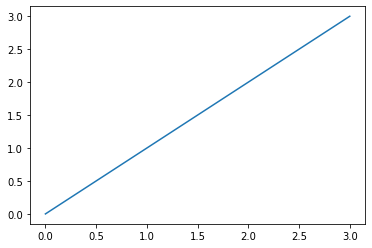

In [18]:
# Implement you solution here. Hint, the following command
%pylab inline 
# will  make matplotlib/pylab available and plots will be displayed directly in the notebook, for example
plt.plot([0,1,2,3],[0,1,2,3])

Don't foget to terminate resources after your experiments. 

In [ ]:
# Clean up volumes